In [1]:
%load_ext nb_mypy

Version 1.0.2


In [2]:
import sys
from typing import *
import matplotlib.pyplot as plt
from numpy.random import normal
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [3]:
produced = [
    (1947, 0),
    (1948, 52),
    (1963, 11000),
    (1969, 14000),
    # from here on we have the number for every year...
    (1998, 43982),
    (1999, 48797),
    (2000, 54586),
    (2001, 54234),
    (2002, 66803),
    (2003, 76827),
    (2004, 88379),
    (2005, 96794),
    (2006, 97515),
    (2007, 98652),
    (2008, 76739),
    (2009, 81850),
    (2010, 96473),
    (2011, 116978),
    (2012, 143096),
    (2013, 162145),
    (2014, 189849),
    (2015, 225121),
    (2016, 237778),
    (2017, 246375),
    (2018, 256255),
    (2019, 280800),
    (2020, 272162),
    (2021, 301915),
]
cumulative = [
    (1956, 10000),
    (1977, 300000),
    (1996, 1000000),
]

In [4]:
Number = Union[float, int]
TimeSeries = Sequence[tuple[int, Number]] # type alias

def piecewise_linear_fit(f: TimeSeries, c: TimeSeries) -> TimeSeries:
    r = [f[0]]
    fi, ci = 1, 0
    while True:
        if ci >= len(c) and fi >= len(f):
            break
        elif ci >= len(c) or f[fi][0] <= c[ci][0]:
            # the next closest data point is in f, use that to get the slope
            slope = (f[fi][1] - r[-1][1]) / (f[fi][0] - r[-1][0])
            to = f[fi][0]
            fi += 1
        elif fi >= len(f) or f[fi][0] > c[ci][0]:
            # the next closest data point is in c, use that to get the slope
            ts = range(1, c[ci][0] - r[-1][0] + 1)
            slope = (c[ci][1] - sum([t[1] for t in r]) - r[-1][1]*len(ts)) / sum(ts)
            to = c[ci][0]
            ci += 1
        (x_0, y_0) = r[-1]
        for x in range(r[-1][0]+1, to+1):
            r.append((x, y_0 + slope * (x - x_0)))
    return r

f = piecewise_linear_fit(produced, cumulative)

print('Produced')
print('--------')
for (t, p) in f:
    print(f'{t} -> {int(p)}')

print('Cumulative')
print('----------')
for i in range(len(f)):
    print(f'{f[i][0]} -> {int(sum([x[1] for x in f[:i+1]]))}')

Produced
--------
1947 -> 0
1948 -> 52
1949 -> 316
1950 -> 581
1951 -> 846
1952 -> 1111
1953 -> 1375
1954 -> 1640
1955 -> 1905
1956 -> 2170
1957 -> 3431
1958 -> 4693
1959 -> 5954
1960 -> 7215
1961 -> 8477
1962 -> 9738
1963 -> 11000
1964 -> 11500
1965 -> 12000
1966 -> 12500
1967 -> 13000
1968 -> 13500
1969 -> 14000
1970 -> 15416
1971 -> 16832
1972 -> 18249
1973 -> 19665
1974 -> 21081
1975 -> 22498
1976 -> 23914
1977 -> 25330
1978 -> 26482
1979 -> 27633
1980 -> 28784
1981 -> 29935
1982 -> 31086
1983 -> 32237
1984 -> 33388
1985 -> 34539
1986 -> 35690
1987 -> 36842
1988 -> 37993
1989 -> 39144
1990 -> 40295
1991 -> 41446
1992 -> 42597
1993 -> 43748
1994 -> 44899
1995 -> 46051
1996 -> 47202
1997 -> 45592
1998 -> 43982
1999 -> 48797
2000 -> 54586
2001 -> 54234
2002 -> 66803
2003 -> 76827
2004 -> 88379
2005 -> 96794
2006 -> 97515
2007 -> 98652
2008 -> 76739
2009 -> 81850
2010 -> 96473
2011 -> 116978
2012 -> 143096
2013 -> 162145
2014 -> 189849
2015 -> 225121
2016 -> 237778
2017 -> 246375
2018 

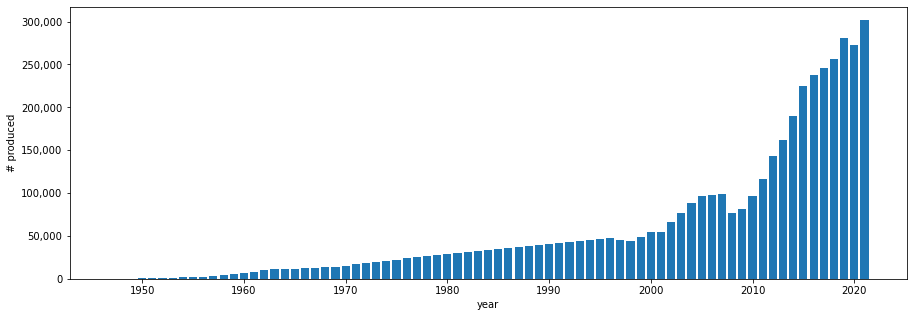

In [5]:
plt.figure(figsize=(15,5))
plt.xlabel('year')
plt.ylabel('# produced')
plt.bar(
    [x[0] for x in f],
    [x[1] for x in f],
)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

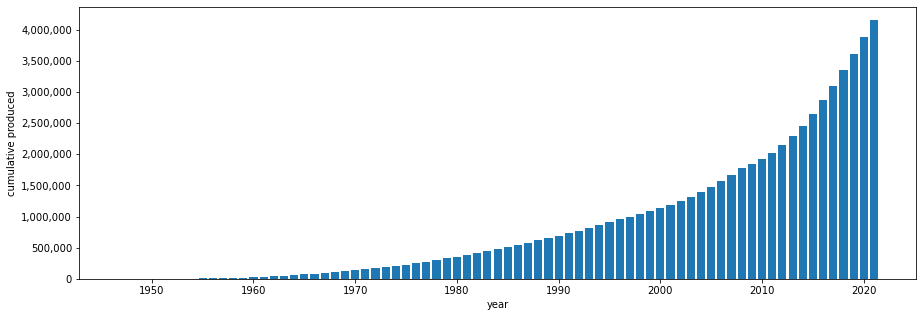

In [6]:
plt.figure(figsize=(15,5))
plt.xlabel('year')
plt.ylabel('cumulative produced')
plt.bar(
    [x[0] for x in f],
    [sum([x[1] for x in f][:i]) for i in range(len(f))],
)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

In [7]:
def ratio_alive(f: list, lifespan: int) -> float:
    total = sum(f)
    alive = sum(f[-lifespan:])
    return alive/total

ds = []
for lifespan in range(10, 25):
    r = ratio_alive([x[1] for x in f], lifespan)
    ds.append((lifespan, r))
    print(f'{lifespan} -> {r:.3f}')

10 -> 0.519
11 -> 0.545
12 -> 0.567
13 -> 0.585
14 -> 0.603
15 -> 0.625
16 -> 0.647
17 -> 0.668
18 -> 0.688
19 -> 0.705
20 -> 0.720
21 -> 0.733
22 -> 0.745
23 -> 0.756
24 -> 0.766


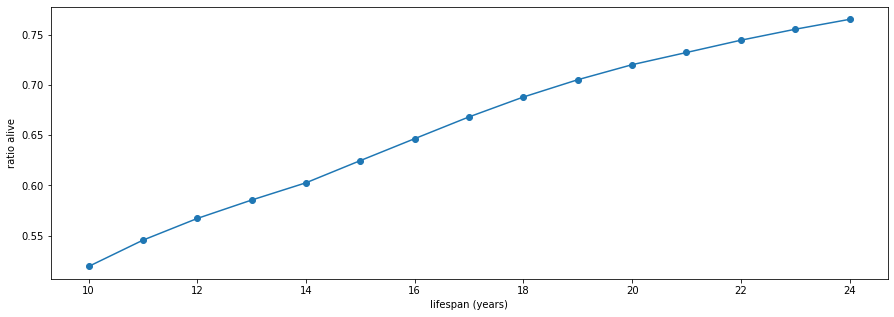

In [8]:
plt.figure(figsize=(15,5))
plt.xlabel('lifespan (years)')
plt.ylabel('ratio alive')
plt.plot(
    [x[0] for x in ds],
    [x[1] for x in ds],
    marker="o",
)

In [9]:
avg_lifespan, sigma = 20, 5 # years
total, num_alive = 0, 0
for (year, num_produced) in f:
    for _ in range(round(num_produced)):
        expiry_year = round(year + max(0, normal(avg_lifespan, sigma)))
        total += 1
        if expiry_year >= 2022:
            num_alive += 1
survival_ratio = num_alive/total
print(f'Assuming avg_lifespan = {avg_lifespan} years and sigma = {sigma} years, survival % = {survival_ratio*100:.1f}')

Assuming avg_lifespan = 20 years and sigma = 5 years, survival % = 70.4


In [10]:
# avg_lifespan_classics, sigma_classics = 33, 10 # years
# avg_lifespan_massprod, sigma_massprod = 15, 5  # years
avg_lifespan_classics, sigma_classics = 25, 10 # years
avg_lifespan_massprod, sigma_massprod = 17, 5  # years
classics_year_end = 1999
total, num_alive = 0, 0
for (year, num_produced) in f:
    for _ in range(round(num_produced)):
        if year < classics_year_end:
            expiry_year = round(year + max(0, normal(avg_lifespan_classics, sigma_classics)))
        else:
            expiry_year = round(year + max(0, normal(avg_lifespan_massprod, sigma_massprod)))
        total += 1
        if expiry_year >= 2022:
            num_alive += 1
print(f'Assuming avg_lifespan_classics = {avg_lifespan_classics} years and sigma_classics = {sigma_classics} years')
print(f'Assuming avg_lifespan_massprod = {avg_lifespan_massprod} years and sigma_massprod = {sigma_massprod} years')
print(f'Survival % = {survival_ratio*100:.1f}')

Assuming avg_lifespan_classics = 25 years and sigma_classics = 10 years
Assuming avg_lifespan_massprod = 17 years and sigma_massprod = 5 years
Survival % = 70.4
